In [1]:
from google.cloud import bigquery
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
import matplotlib.pyplot as plt
sns.set()

In [2]:
sentence_df = pd.read_csv("daily_mail_first_sentence.csv")

In [3]:
sentence_df = sentence_df.astype({"DATE":"datetime64"}) 
sentence_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17100 entries, 0 to 17099
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   GKGRECORDID     17100 non-null  object        
 1   DATE            17100 non-null  datetime64[ns]
 2   first_sentence  17100 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 400.9+ KB


In [4]:
prediction_df = pd.read_csv("output/predictions.csv")

In [5]:
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17100 entries, 0 to 17099
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sentence         17100 non-null  object 
 1   logit            17100 non-null  object 
 2   prediction       17100 non-null  object 
 3   sentiment_score  17100 non-null  float64
dtypes: float64(1), object(3)
memory usage: 534.5+ KB


In [6]:
merged_df = pd.concat([sentence_df, prediction_df], axis=1)

In [7]:
merged_df[["first_sentence", "prediction", "sentiment_score"]].head()

,first_sentence,prediction,sentiment_score
0,Newspaper publisher Trinity Mirror will reveal a fall in profits tomorrow.,negative,-0.947576
1,"The FTSE 100 soared to a record high last week, but private share buyers believe politicians need to do more to encourage stock market investment, and most believe politicians do not do enough to support them.",negative,-0.532165
2,"The broadcaster ITV, which is in talks to buy the production company behind BBC1’s hit show The Voice, will report sharply increased profits this week as boss Adam Crozier’s five-year turnaround plan comes to fruition.",positive,0.903221
3,It counts Prince Harry among its customers and now sales at the British arm of US food giant Whole Foods have topped £100million for the first time since launching here ten years ago.,positive,0.840543
4,Billionaire investor Warren Buffett has admitted being ‘embarrassed’ by taking too long to exit a £1.5billion investment in Tesco as it became mired in an accounting scandal.,negative,-0.846165


In [8]:
# aggregate to daily/monthly level
sentiment = merged_df.groupby("DATE").agg({"sentiment_score":"mean"})

<AxesSubplot:xlabel='DATE'>

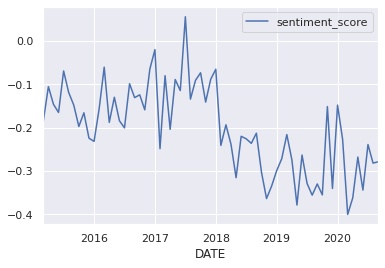

In [9]:
sentiment.resample("MS").mean().plot()

In [10]:
# join with macroeconomic indicators 

In [21]:
import yfinance as yf

msft = yf.Ticker("^FTSE")

# get stock info
msft.info

# get historical market data
hist = msft.history(start="2015-03-01", end="2020-09-30")

In [30]:
compare_df = pd.concat([hist["Close"], sentiment], axis=1).dropna()

In [33]:
compare_df["close_diff"] = compare_df["Close"].diff()
compare_df["sentiment_score_diff"] = compare_df["sentiment_score"].diff()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='sentiment_score_diff', ylabel='close_diff'>

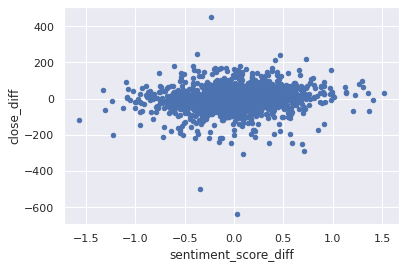

In [38]:
compare_df.plot.scatter(x="sentiment_score_diff", y="close_diff")